<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_2/Data_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Tabular and Graphical Methods

In this notebook, we will explore data visualizations, how to construct different graphs, and the principles of design. Additionally we will answer the question: why visualize? We will review Anscombe's quartet as a demonstration.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Visualizations

#### Methods to Visualize

Categorical Variables:


1.   Bar Charts
2.   Pie Charts
3.   Frequency Distribution




Frequency distribution example, personality types for HR department using the Myers-Briggs assessment into 4 categories.

In [ ]:
# read in dataframe directly from source, to ensure reproducible research
myer_brig = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch02_Data_Files.xlsx",
                   sheet_name='Myers_Briggs')

In [ ]:
myer_brig.head()

,Employee,Personality
0,1,Diplomat
1,2,Diplomat
2,3,Explorer
3,4,Diplomat
4,5,Diplomat


In [ ]:
# how often does each label occur?
myer_brig.Personality.value_counts().index

Index(['Explorer', 'Diplomat', 'Sentinel', 'Analyst'], dtype='object')

In [ ]:
# Bar Chart

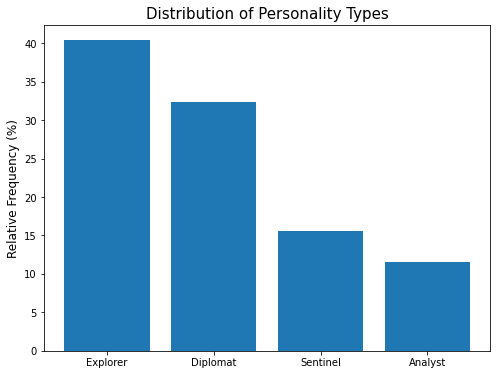

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make index in the same order as the value counts
indx = myer_brig.Personality.value_counts().index
# divide each by len
series = myer_brig.Personality.value_counts()/len(myer_brig)
# multiply by 100 
plt.bar(indx, series * 100)
plt.title("Distribution of Personality Types", size=15)
plt.ylabel('Relative Frequency (%)', size=12)
plt.show()

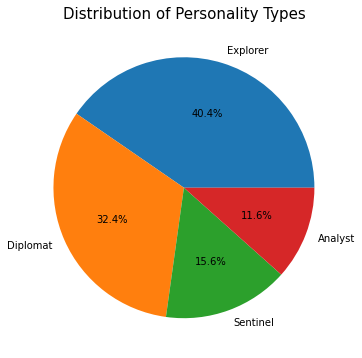

In [ ]:
# Pie Chart
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
myer_brig['Personality'].value_counts().plot.pie(autopct='%1.1f%%', label='')

plt.title("Distribution of Personality Types", size=15)
plt.show()

In [ ]:
# read in dataframe directly from source, to ensure reproducible research
myer_brig2 = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch02_Data_Files.xlsx",
                   sheet_name='Myers_Briggs2')

In [ ]:
myer_brig2.head()

,Employee,Personality,Sex
0,1,Diplomat,Female
1,2,Diplomat,Female
2,3,Explorer,Male
3,4,Diplomat,Female
4,5,Diplomat,Female


In [ ]:
# contingency tables
pd.crosstab(myer_brig2['Sex'], myer_brig2['Personality'], margins = True)

Personality,Analyst,Diplomat,Explorer,Sentinel,All
Sex,,,,,
Female,55,164,194,79,492
Male,61,160,210,77,508
All,116,324,404,156,1000


In [ ]:
myer_brig2_stacked = myer_brig2.groupby(['Personality', 'Sex'])['Sex'].count().unstack('Sex')
myer_brig2_stacked

Sex,Female,Male
Personality,,
Analyst,55,61
Diplomat,164,160
Explorer,194,210
Sentinel,79,77


In [ ]:
myer_brig2_stacked.columns

Index(['Female', 'Male'], dtype='object', name='Sex')

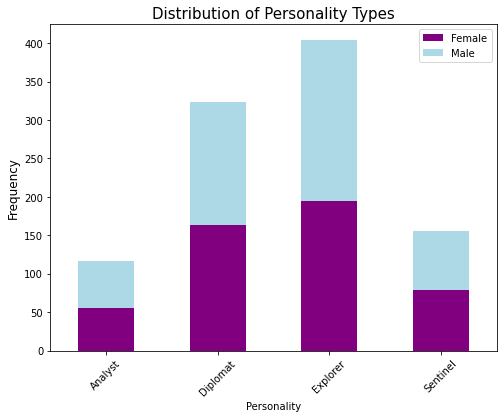

In [ ]:
# bar chart

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# plot male vs female
myer_brig2_stacked[['Female', 'Male']].plot(kind='bar', stacked=True, ax=ax, color=['purple','lightblue'])

ax.set_ylabel('Scores')
plt.title("Distribution of Personality Types", size=15)
ax.legend()
plt.xticks(rotation=45)
plt.ylabel('Frequency', size=12)
plt.show()

Here is the stacked bar chart, we break up each segment into the distribution of male to female and use the legend to show the values. So we can see that for each category there is roughly the same number of male to female.

## Numerical Data

Case study: 40 recent real estate transactions, house price (in $1,000s), square footage, number of bedrooms, number of bathrooms, year the house was built, type of house.

In [ ]:
pg_sales = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch02_Data_Files.xlsx",
                   sheet_name='PG_Sales')

In [ ]:
pg_sales.head()

,Transaction,Price,Sqft,Bedrooms,Baths,Year Built,Type
0,1,200,1684,3,2.0,2005,Single
1,2,435,2358,3,2.5,2017,Single
2,3,265,1001,2,2.0,1978,Single
3,4,300,1238,2,2.0,2000,Single
4,5,170,1170,3,2.0,2008,Single


In [ ]:
pg_sales.Price.min(), pg_sales.Price.max()

(125, 649)

In [ ]:
(pg_sales.Price.max() - pg_sales.Price.min())/6

87.33333333333333

This interval size is difficult to interpret, we can use it as a basis to round up to a whole number such as $100

In [ ]:
# cut the data into intervals, that range from 100 to 800 and step by 100
pg_sales['interval'] = pd.cut(pg_sales['Price'], range(100, 800, 100))

# group by the interval count, rename the column to frequency
pg_sales_grp = pg_sales.groupby('interval')[['interval']].count().rename(columns={'interval':'frequency'}).reset_index()
pg_sales_grp

,interval,frequency
0,"(100, 200]",9
1,"(200, 300]",16
2,"(300, 400]",8
3,"(400, 500]",4
4,"(500, 600]",2
5,"(600, 700]",1


In [ ]:
# convert interval into string to use as the index
[str(i) for i in pg_sales.groupby('interval')[['interval']].count().index]

['(100, 200]',
 '(200, 300]',
 '(300, 400]',
 '(400, 500]',
 '(500, 600]',
 '(600, 700]']

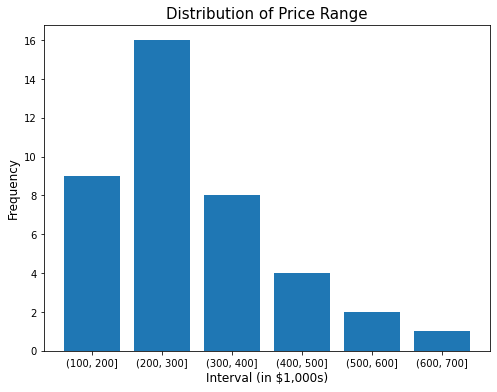

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make index in the same order as the value counts
indx = [str(i) for i in pg_sales.groupby('interval')[['interval']].count().index]
# divide each by len
series = pg_sales.groupby('interval')['interval'].count()
# multiply by 100 
plt.bar(indx, series)
plt.title("Distribution of Price Range", size=15)
plt.ylabel('Frequency', size=12)
plt.xlabel('Interval (in $1,000s)', size=12)
plt.show()

We can see how the frequency distribution looks like. We see most houses are in the range of 200-300 thousand dollars. And the rest of the houses are close to this value, with a right tail of only 1 home that is 600-700 thousand dollars

In [ ]:
# if we want the cumulative sum
pg_sales_grp.frequency.cumsum()

0     9
1    25
2    33
3    37
4    39
5    40
Name: frequency, dtype: int64

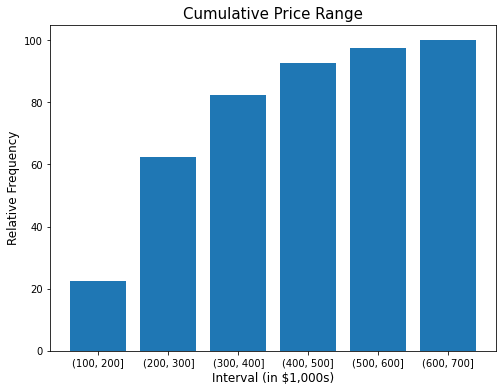

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make index in the same order as the value counts
indx = [str(i) for i in pg_sales.groupby('interval')[['interval']].count().index]
# divide each by len
series = pg_sales_grp.frequency.cumsum()/len(pg_sales)
# multiply by 100 
plt.bar(indx, series*100)
plt.title("Cumulative Price Range", size=15)
plt.ylabel('Relative Frequency', size=12)
plt.xlabel('Interval (in $1,000s)', size=12)
plt.show()

We can visualize on a cumulative basis that 80% of all homes are less than $400,000 and see the relative growth plateaus after that. Notice we reach 100% when we are at the end of all frequencies.



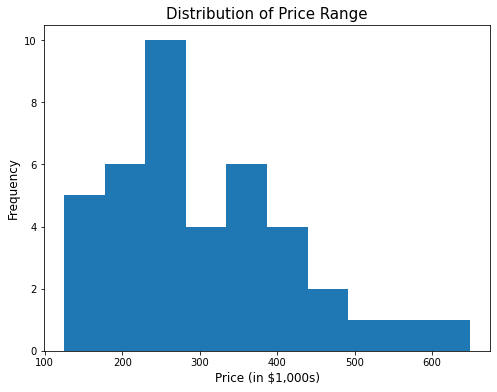

In [ ]:
# Histograms
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.hist(pg_sales.Price)
plt.title("Distribution of Price Range", size=15)
plt.ylabel('Frequency', size=12)
plt.xlabel('Price (in $1,000s)', size=12)
plt.show()

Now we see more granularity in the information and can see more that around $250,000 is where most of the houses are in the price range. Notice how we now can see more detail in the overall distribution of values. 

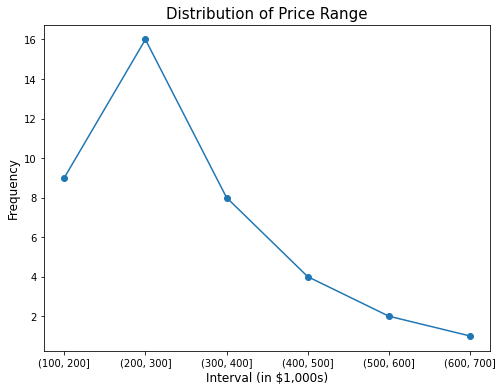

In [ ]:
# line plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make index in the same order as the value counts
indx = [str(i) for i in pg_sales.groupby('interval')[['interval']].count().index]
# divide each by len
series = pg_sales.groupby('interval')['interval'].count()
# multiply by 100 
plt.plot(indx, series, '-o')
plt.title("Distribution of Price Range", size=15)
plt.ylabel('Frequency', size=12)
plt.xlabel('Interval (in $1,000s)', size=12)
plt.show()

We see the data is positively skewed with most of the houses within the 200,300 thousand dollar range.

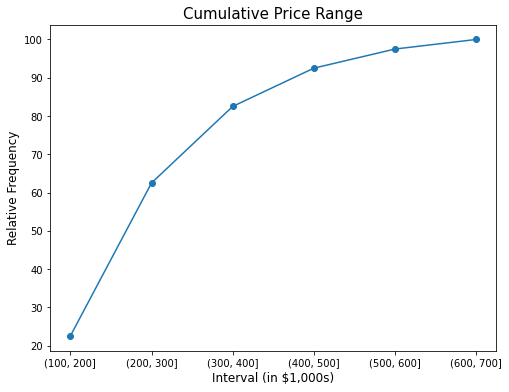

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make index in the same order as the value counts
indx = [str(i) for i in pg_sales.groupby('interval')[['interval']].count().index]
# divide each by len
series = pg_sales_grp.frequency.cumsum()/len(pg_sales)
# multiply by 100 
plt.plot(indx, series*100, '-o')
plt.title("Cumulative Price Range", size=15)
plt.ylabel('Relative Frequency', size=12)
plt.xlabel('Interval (in $1,000s)', size=12)
plt.show()

We see a similar pattern from the bar chart, the smooth curve helps to visualize the plateau a bit more clear.

## Scatter plots

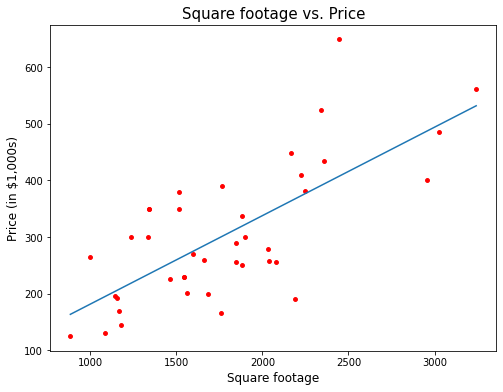

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make plot
pg_sales.plot.scatter(x='Sqft', y='Price', ax=ax, c='r', s=15)
# plot a line of best fit
plt.plot(np.unique(pg_sales['Sqft']), 
         np.poly1d(np.polyfit(pg_sales['Sqft'], 
         pg_sales['Price'], 1))(np.unique(pg_sales['Sqft'])))
plt.title("Square footage vs. Price", size=15)
plt.ylabel('Price (in $1,000s)', size=12)
plt.xlabel('Square footage', size=12)
plt.show()

Here is a scatterplot of Square footage against price. Notice the x axis has the independent variable of square footage and the y axis has the dependent variable of price. 

We plot a line of best fit using the least squares polynomial fit, this creates a y = mx+b line to capture the general linear pattern of the data. Using this line, we can articulate that there is a positive relationship between square footage and the price. So the larger the house, the higher the price.

Plot and color by category

In [ ]:
pg_sales['Type'].unique()

array(['Single', 'Condo'], dtype=object)

In [ ]:
colors = {'Single':'purple', 'Condo':'red'}

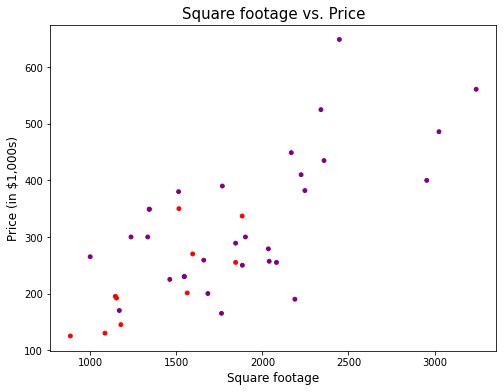

In [ ]:
## Categorical scatter plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# make plot
pg_sales.plot.scatter(x='Sqft', y='Price', ax=ax, c=pg_sales['Type'].map(colors), s=15)
plt.title("Square footage vs. Price", size=15)
plt.ylabel('Price (in $1,000s)', size=12)
plt.xlabel('Square footage', size=12)
plt.show()

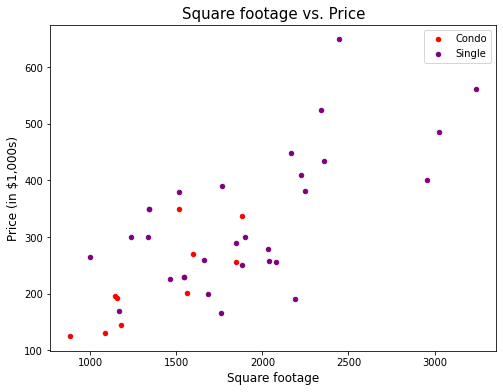

In [ ]:
# To add the legend automatically, let's use groupby
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# group by the type
grouped = pg_sales.groupby('Type')
# iterate over values
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Sqft', y='Price', label=key, color=colors[key])
plt.title("Square footage vs. Price", size=15)
plt.ylabel('Price (in $1,000s)', size=12)
plt.xlabel('Square footage', size=12)
plt.show()

We see a positive linear relationship, this also holds true depending on the type of house. Where condominiums tend to be smaller than single family houses and therefore sell for less. 

## Line Charts over time

In [ ]:
stock_pr = pd.read_excel("https://lectures.mhhe.com/connect/jaggia4e_1260719294/student/data_files/jaggia_BS_4e_ch02_Data_Files.xlsx",
                   sheet_name='Apple_Merck')

In [ ]:
stock_pr.head()

,Date,Apple,Merck
0,2016-01-01,90.96,44.98
1,2016-02-01,90.35,44.57
2,2016-03-01,102.40,46.97
3,2016-04-01,88.07,49.11
4,2016-05-01,93.82,50.38


In [ ]:
# convert date to datetime
stock_pr['Date'] = stock_pr['Date'].apply(pd.to_datetime)

In [ ]:
# set the date as the index
stock_pr.set_index('Date', inplace=True)

In [ ]:
# notice how the index has changed
stock_pr.head()

,Apple,Merck
Date,,
2016-01-01,90.96,44.98
2016-02-01,90.35,44.57
2016-03-01,102.40,46.97
2016-04-01,88.07,49.11
2016-05-01,93.82,50.38


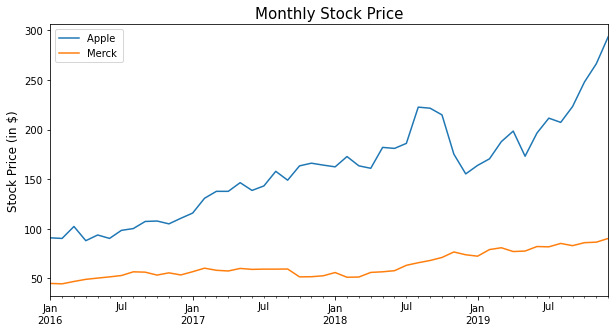

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# make plot
stock_pr.plot(ax=ax)
plt.title("Monthly Stock Price", size=15)
plt.ylabel('Stock Price (in $)', size=12)
plt.xlabel('', size=12)
plt.show()

This plot shows "the monthly stock prices for Apple and Merck over the years 2016 through 2019. Both stocks rose over this period which is not surprising given the growth in the U.S. economy over this time period. However, the rise in Apple’s stock price is far more dramatic as compared to Merck’s stock price. There is also a lot more volatility in Apple’s stock price. Specifically, we see a dramatic decline in Apple’s stock at the end of 2018. This dip corresponded to news that the company would no longer offer unit sales data for its products. At the time, some wondered if this lack of transparency presaged weaker iPhone sales in the future. Fortunately for Apple, this prediction did not materialize."

### Why Visualize?

#### Anscombe's Quartet - Code from Professor Bianco

https://github.com/fedhere/UInotebooks/blob/master/Anscombe's%20Quartet.ipynb

In [ ]:
# read in file from github
if not os.path.isfile("anscombe.txt"):
    !curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/anscombe.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   651  100   651    0     0   3616      0 --:--:-- --:--:-- --:--:--  3616


In [ ]:
df = pd.read_csv("anscombe.txt", header = [1, 2], nrows = 11, delimiter=' ')
df

Anscombe-Data-Set   I         ...     IV Unnamed: 9_level_0 Unnamed: 10_level_0
   Unnamed: 0_level_1   X      Y  ...      Y Unnamed: 9_level_1 Unnamed: 10_level_1
0                 NaN  10   8.04  ...   6.58                NaN                 NaN
1                 NaN   8   6.95  ...   5.76                NaN                 NaN
2                 NaN  13   7.58  ...   7.71                NaN                 NaN
3                 NaN   9   8.81  ...   8.84                NaN                 NaN
4                 NaN  11   8.33  ...   8.47                NaN                 NaN
5                 NaN  14   9.96  ...   7.04                NaN                 NaN
6                 NaN   6   7.24  ...   5.25                NaN                 NaN
7                 NaN   4   4.26  ...  12.50                NaN                 NaN
8                 NaN  12  10.84  ...   5.56                NaN                 NaN
9                 NaN   7   4.82  ...   7.91                NaN                 NaN
10                NaN   5   5.68  ...   6.89                NaN                 NaN

[11 rows x 11 columns]

In [ ]:
# narrow to data we care about
ansc = df[['I', 'II', 'III', 'IV']]
ansc

I         II       III         IV       
     X      Y   X     Y   X      Y   X      Y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

## Summary Statistics

How are the means different? What about the standard deviation?

In [ ]:
print("Distribution Means:               {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.mean(), ansc.II.Y.mean(), ansc.III.Y.mean(), ansc.IV.Y.mean()))
print("Distribution Standard Deviations: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}"\
    .format(ansc.I.Y.std(), ansc.II.Y.std(), ansc.III.Y.std(), ansc.IV.Y.std()))

Distribution Means:               7.50, 7.50, 7.50, 7.50
Distribution Standard Deviations: 2.03, 2.03, 2.03, 2.03


Notice they have the same means and standard deviations. Let's visualize the data first using box plots, then histograms

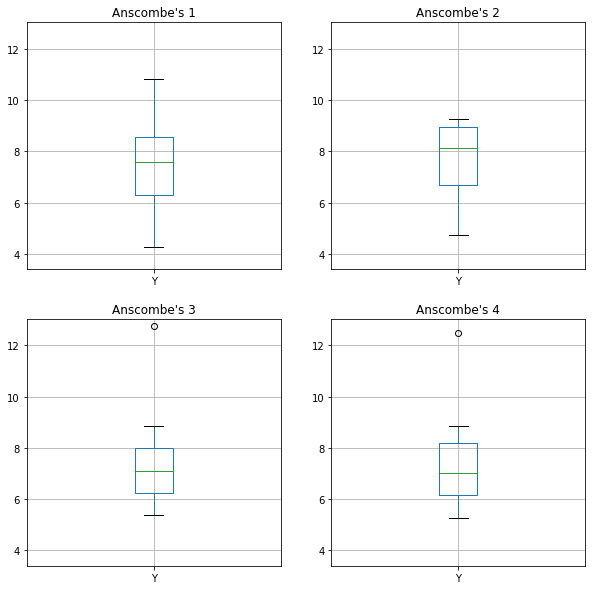

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = [0]*4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)
# setting y axis limits to the max and mean of each distribution
ylims = (min(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3,
         max(np.concatenate([ansc.I.Y, ansc.II.Y, ansc.III.Y, ansc.IV.Y])) 
         + 0.3)
for i,a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    a.boxplot(column = 'Y', ax = ax[i])
    ax[i].set_ylim(ylims)
    ax[i].set_title("Anscombe's %d"%(i+1))
plt.show()

We see that 1 and 2 have a slightly different distribution of values. But the box plot leaves some information about the granularity of distributions. We can also see the outliers in 3 and 4.

Lets see what a histogram will show.

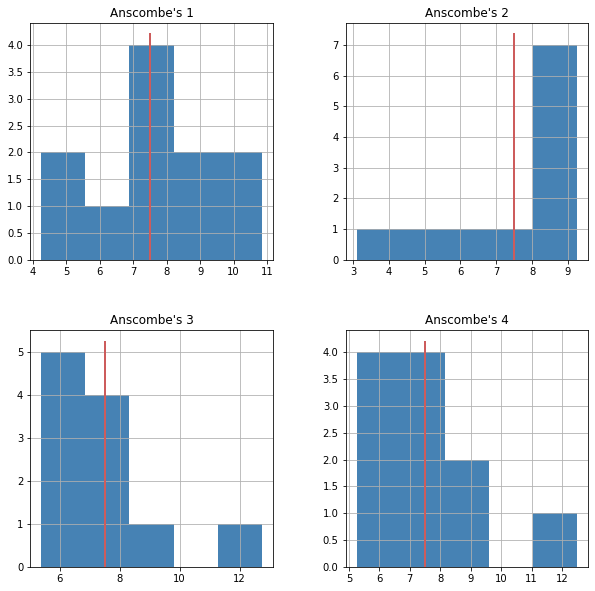

In [ ]:
fig = plt.figure(figsize = (10,10))
ax=[0] * 4

ax[0] = fig.add_subplot(221)
ax[1] = fig.add_subplot(222)
ax[2] = fig.add_subplot(223)
ax[3] = fig.add_subplot(224)

for i, a in enumerate([ansc.I, ansc.II, ansc.III, ansc.IV]):
    #
    a.hist(column = 'Y', color = 'SteelBlue', bins = 5, ax = ax[i])
    ax[i].plot([a.Y.mean(), a.Y.mean()], ax[i].get_ylim(), '-', 
               color = 'IndianRed', lw = 2)
    ax[i].set_title("Anscombe's %d"%(i+1))
plt.show()

These histograms provide the clearest representation of just how different these data sets are, even though they all have the same mean and standard deviation. 

Now let's plot the data as a scatter plot. First we will fit a line to the different distributions. One with a linear, the other with a polynomial regression model that squares the X value.

When using the regression lines, we fit an ordinary least squares fit to the data. Make sure to add a constant to the X values, this ensures that the line will go through 0. 

In [ ]:
# dictionary for linear fit
lregmodels={}
# dictionary for polynomial fit
pregmodels={}
# iterate through each distribution
for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #create x^2 column
    a['X2'] = a.X**2
    rm = sm.OLS(a.Y, sm.add_constant(a.X))
    lregmodels[i] = rm.fit()
    
    pregmodels[i] = smf.ols(formula='Y ~ X2 + X', data = a).fit()
    
    print ("linear regression slope {}".format(lregmodels[i].params))
    print ("polynomial regression slope {}".format(pregmodels[i].params))  

linear regression slope const    3.000091
X        0.500091
dtype: float64
polynomial regression slope Intercept    0.755068
X2          -0.031620
X            1.069252
dtype: float64
linear regression slope const    3.000909
X        0.500000
dtype: float64
polynomial regression slope Intercept   -5.995734
X2          -0.126713
X            2.780839
dtype: float64
linear regression slope const    3.002455
X        0.499727
dtype: float64
polynomial regression slope Intercept    5.111767
X2           0.029709
X           -0.035028
dtype: float64
linear regression slope const    3.001727
X        0.499909
dtype: float64
polynomial regression slope Intercept    0.178018
X2          -0.018577
X            1.001489
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


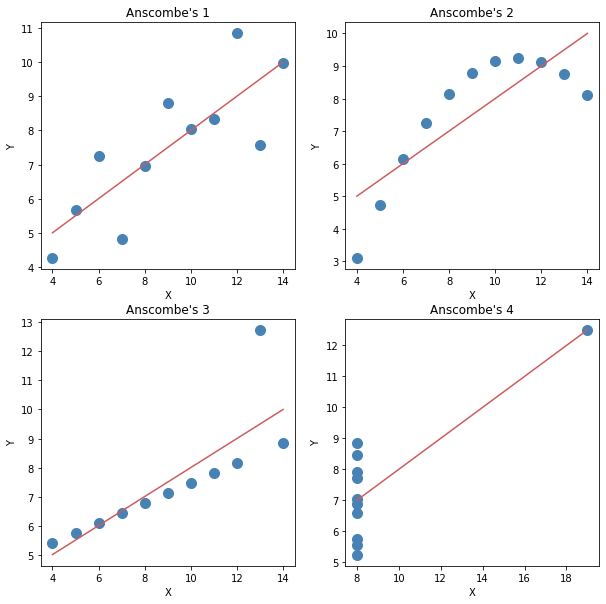

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=[0]*4

ax[0]=fig.add_subplot(221)
ax[1]=fig.add_subplot(222)
ax[2]=fig.add_subplot(223)
ax[3]=fig.add_subplot(224)

for i,a in enumerate([ansc.I,ansc.II,ansc.III,ansc.IV]):
    #
    a.plot(kind='scatter',s=100, x='X',y='Y', color='SteelBlue', ax=ax[i])
    X_prime = sm.add_constant(np.linspace(a.X.min(), a.X.max(), 100))
    y_hat = lregmodels[i].predict(X_prime)
    ax[i].plot(X_prime[:,1], y_hat, '-', color='IndianRed')  
    ax[i].set_title("Anscombe's %d"%(i+1))


We see the actual data is very different between each distribution. Although the linear regression slope is similar between each, the points only really fit the line in the first distribution. We see the effect of outliers in 3 and 4. The polynomial fit would be best for distribution 2.